In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("index.csv")

In [3]:
df.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [4]:
X = df.drop(columns = ["Creditability"])
y = df['Creditability'].values

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [8]:
train_x=sc.fit_transform(X_train)
test_x=sc.fit_transform(X_test)

In [9]:
X_train = train_x
X_test = test_x

In [10]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.0.0


In [12]:
epochs = 2
model = Sequential()
model.add(SimpleRNN(32, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                1088      
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 2,305
Trainable params: 2,241
Non-trainable params: 64
_____________________________________________________

In [15]:
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,

In [16]:
model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Train on 670 samples, validate on 330 samples
Epoch 1/2
670/670 [==============================] - 3s 4ms/sample - loss: 0.7194 - accuracy: 0.6612 - val_loss: 0.6847 - val_accuracy: 0.4697
Epoch 2/2
670/670 [==============================] - 0s 311us/sample - loss: 0.6636 - accuracy: 0.6567 - val_loss: 0.6803 - val_accuracy: 0.5273


In [33]:
X_test = float(X_test)

TypeError: only size-1 arrays can be converted to Python scalars

In [31]:
X_test = tf.placeholder(shape=[X_test, None],dtype=tf.float64)
#Y = tf.placeholder(shape=[n_y, None],dtype=tf.float64)

AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [17]:
Y_pred = model.predict(X_test)
Y_pred

array([[0.51662785],
       [0.49683493],
       [0.4819197 ],
       [0.69087416],
       [0.5460362 ],
       [0.5339124 ],
       [0.5088034 ],
       [0.4972594 ],
       [0.50123185],
       [0.5161415 ],
       [0.4861768 ],
       [0.51024556],
       [0.4887101 ],
       [0.48817837],
       [0.49083856],
       [0.4820731 ],
       [0.49350998],
       [0.48655617],
       [0.49565107],
       [0.69380414],
       [0.5342659 ],
       [0.53549635],
       [0.5032704 ],
       [0.49609017],
       [0.70298713],
       [0.5000445 ],
       [0.48260728],
       [0.6824478 ],
       [0.52864593],
       [0.5146802 ],
       [0.5142904 ],
       [0.53268224],
       [0.5262175 ],
       [0.49709842],
       [0.4855277 ],
       [0.4994102 ],
       [0.4837242 ],
       [0.51193255],
       [0.49990094],
       [0.4975297 ],
       [0.69604087],
       [0.48323068],
       [0.49396276],
       [0.49993953],
       [0.49639186],
       [0.50419205],
       [0.49315837],
       [0.487

In [18]:
Y_pred = (Y_pred > 0.5)

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
cm_rnn = confusion_matrix(y_test, Y_pred)

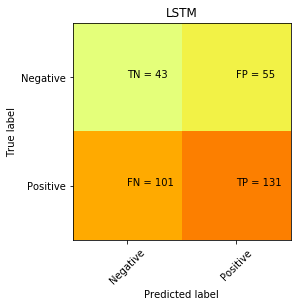

In [22]:
plt.clf()
plt.imshow(cm_lstm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('LSTM')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_lstm[i][j]))
plt.show()

In [23]:
precision_ann = precision_score(y_test, Y_pred)
print("precision = "+str(precision_ann))
recall_ann = recall_score(y_test, Y_pred)
print("recall = "+ str(recall_ann))
accuracy_ann = accuracy_score(y_test, Y_pred)
print("accuracy = "+ str(accuracy_ann))
F1_score_ann = f1_score(y_test, Y_pred)
print("F1 Score = "+ str(F1_score_ann))


precision = 0.7043010752688172
recall = 0.5646551724137931
accuracy = 0.5272727272727272
F1 Score = 0.6267942583732058


In [24]:
tn, fp, fn, tp = cm_lstm.ravel()

In [25]:
specificity = (tn)/(tn+fp)
print("specificity ="+ str(specificity))

specificity =0.4387755102040816
